In [1]:
from utils import *
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np

In [3]:
rIm=read_raw("static_videos/1015/scene1/1015_d03_f32_16mm.raw", 
             frame = 1, rows=1087*2, runL=3968)
rIm = rIm[:, ::-1, ::-1]

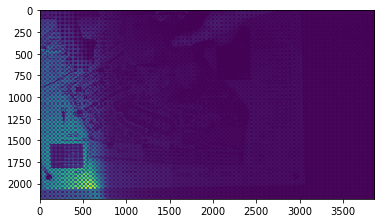

In [4]:
plt.imshow(rIm[0])

In [5]:
patch = rIm[0, 1743:1759, 523:539].copy() # 1745:1761, 525:541

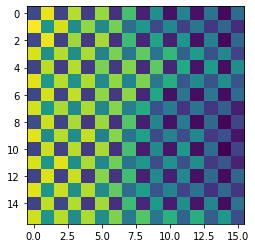

In [6]:
plt.imshow(patch)

In [7]:
patch.shape
patch = patch/patch.max()

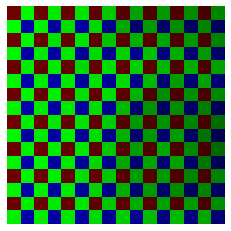

In [8]:
viz_raw_img = viz_raw(patch)
plt.imshow(viz_raw_img/viz_raw_img.max())
plt.axis('off')
plt.savefig("viz1.png", bbox_inches='tight', pad_inches=0)

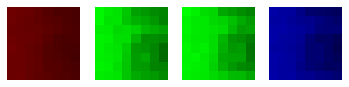

In [9]:
patch_stack = raw_to_stack(patch)
r, g1, g2, b = viz_stack(patch_stack)
fig, ax = plt.subplots(1, 4)
ax[0].imshow(r)
ax[0].axis('off')
ax[1].imshow(g1)
ax[1].axis('off')
ax[2].imshow(g2)
ax[2].axis('off')
ax[3].imshow(b)
ax[3].axis('off')
plt.savefig("viz2.png", bbox_inches='tight', pad_inches=0)

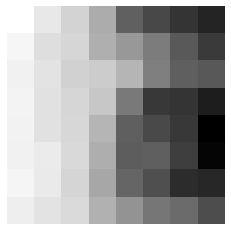

In [10]:
from skimage.measure import block_reduce
gray_patch = block_reduce(patch, block_size=(2, 2), func=np.mean)
plt.imshow(gray_patch,cmap='gray')
plt.axis('off')
plt.savefig("viz3.png", bbox_inches='tight', pad_inches=0)

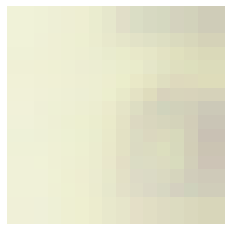

In [11]:
rgb_patch = cv2.cvtColor((patch*65535.).astype(np.uint16), cv2.COLOR_BAYER_RG2RGB)
rgb_patch = adjustColor(rgb_patch,rc = 1, bc = 1, gc = 0.7, gain=1.3, gamma = 1.25, contrast=1.5)
plt.imshow(rgb_patch)
plt.axis('off')
plt.savefig("viz4.png", bbox_inches='tight', pad_inches=0)